<a href="https://colab.research.google.com/github/ashu433/Trading_codes/blob/main/trading_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

In [ ]:
sesi=requests.Session()
headers={}
headers['user-agent']='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
a=sesi.get("https://www.nseindia.com/",headers=headers)

In [ ]:
indices=["NIFTY","BANKNIFTY","FINNIFTY"]

In [ ]:
def fetch_option_chain(scrip):
  if scrip in indices:
    url=f'https://www.nseindia.com/api/option-chain-indices?symbol={scrip}'
  else:
    stock=scrip.replace("&","%26")
    url=f"https://www.nseindia.com/api/option-chain-equities?symbol={stock}"


  a=sesi.get(url,headers=headers)
  return a.json()['records']

In [ ]:
def getoptionchain(name,expiry):
  optionchain=pd.DataFrame()
  option_chain_record=fetch_option_chain(name)
  option_chain_data=option_chain_record['data']
  option_chain_data_df=pd.DataFrame(option_chain_data)
  option_chain_data_df=option_chain_data_df[(option_chain_data_df.expiryDate==expiry)]

  option_chain_ce=pd.DataFrame()
  option_chain_ce["CE"]=option_chain_data_df["CE"]

  Option_chain_ce_Expand=pd.concat([option_chain_ce.drop(["CE"],axis=1), option_chain_ce["CE"].apply(pd.Series)],axis=1)

  option_chain_pe=pd.DataFrame()
  option_chain_pe["PE"]=option_chain_data_df["PE"]

  Option_chain_pe_Expand=pd.concat([option_chain_pe.drop(["PE"],axis=1), option_chain_pe["PE"].apply(pd.Series)],axis=1)

  optionchain["CE_OI"]=Option_chain_ce_Expand['openInterest']
  optionchain["CE_CHNG_IN_OI"]=Option_chain_ce_Expand['changeinOpenInterest']
  optionchain["CE_Volume"]=Option_chain_ce_Expand["totalTradedVolume"]
  optionchain["CE_IV"]=Option_chain_ce_Expand["impliedVolatility"]
  optionchain["CE_LTP"]=Option_chain_ce_Expand["lastPrice"]
  optionchain["CE_CHNG"]=Option_chain_ce_Expand["change"]
  optionchain["CE_BID_QTY"]=Option_chain_ce_Expand["bidQty"]
  optionchain["CE_BID_PRICE"]=Option_chain_ce_Expand["bidprice"]
  optionchain["CE_ASK_PRICE"]=Option_chain_ce_Expand["askPrice"]
  optionchain["CE_ASK_QTY"]=Option_chain_ce_Expand["askQty"]

  optionchain["strikePrice"]=option_chain_data_df["strikePrice"]

  optionchain["PE_ASK_PRICE"]=Option_chain_pe_Expand["askPrice"]
  optionchain["PE_ASK_QTY"]=Option_chain_pe_Expand["askQty"]
  optionchain["PE_BID_QTY"]=Option_chain_pe_Expand["bidQty"]
  optionchain["PE_BID_PRICE"]=Option_chain_pe_Expand["bidprice"]
  optionchain["PE_CHNG"]=Option_chain_pe_Expand["change"]
  optionchain["PE_LTP"]=Option_chain_pe_Expand["lastPrice"]
  optionchain["PE_IV"]=Option_chain_pe_Expand["impliedVolatility"]
  optionchain["PE_Volume"]=Option_chain_pe_Expand["totalTradedVolume"]
  optionchain["PE_CHNG_IN_OI"]=Option_chain_pe_Expand['changeinOpenInterest']
  optionchain["PE_OI"]=Option_chain_pe_Expand['openInterest']

  return optionchain

In [ ]:
scripname="ADANIENT"
Expiry_DATE="25-May-2023"

Option_chain=getoptionchain(scripname,Expiry_DATE)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Option_chain

,CE_OI,CE_CHNG_IN_OI,CE_Volume,CE_IV,CE_LTP,CE_CHNG,CE_BID_QTY,CE_BID_PRICE,CE_ASK_PRICE,CE_ASK_QTY,strikePrice,PE_ASK_PRICE,PE_ASK_QTY,PE_BID_QTY,PE_BID_PRICE,PE_CHNG,PE_LTP,PE_IV,PE_Volume,PE_CHNG_IN_OI,PE_OI
0,0,0,0,0.00,0.00,0.00,10000,833.25,1019.25,10000,920,3.95,2500,250,3.75,1.80,3.90,136.69,47,25,29
1,0,0,0,0.00,0.00,0.00,10000,809.10,994.30,10000,940,0.00,0,1750,1.10,0.00,0.00,0.00,0,0,0
2,0,0,0,0.00,0.00,0.00,10000,793.65,953.25,10000,960,0.00,0,1000,1.20,0.00,0.00,0.00,0,0,0
3,0,0,0,0.00,0.00,0.00,10000,769.10,932.55,10000,980,0.00,0,250,3.15,-0.55,3.15,126.38,2,0,0
4,10,0,0,0.00,0.00,0.00,10000,780.30,881.75,250,1000,4.90,250,2500,4.75,1.90,4.80,131.86,873,91,488
5,0,0,0,0.00,0.00,0.00,10000,746.25,910.60,10000,1020,0.00,0,2250,3.25,0.00,0.00,0.00,0,0,2
6,0,0,0,0.00,0.00,0.00,10000,732.85,891.05,10000,1040,0.00,0,250,4.50,-157.70,5.00,124.80,7,1,7
7,0,0,0,0.00,0.00,0.00,10000,703.75,842.40,10000,1060,0.00,0,1000,3.40,0.00,0.00,0.00,0,0,0
8,0,0,0,0.00,0.00,0.00,10000,671.45,820.10,10000,1080,8.85,10000,250,4.50,-191.05,3.55,110.99,1,0,1
9,0,0,0,0.00,0.00,0.00,10000,648.95,801.50,10000,1100,6.75,2500,2500,6.40,2.20,6.20,118.53,143,34,82


In [ ]:
Option_chain.head()

,CE_OI,CE_CHNG_IN_OI,CE_Volume,CE_IV,CE_LTP,CE_CHNG,CE_BID_QTY,CE_BID_PRICE,CE_ASK_PRICE,CE_ASK_QTY,strikePrice,PE_ASK_PRICE,PE_ASK_QTY,PE_BID_QTY,PE_BID_PRICE,PE_CHNG,PE_LTP,PE_IV,PE_Volume,PE_CHNG_IN_OI,PE_OI
0,0,0,0,0.0,0.0,0.0,10000,833.25,1019.25,10000,920,3.95,2500,250,3.75,1.80,3.90,136.69,47,25,29
1,0,0,0,0.0,0.0,0.0,10000,809.10,994.30,10000,940,0.00,0,1750,1.10,0.00,0.00,0.00,0,0,0
2,0,0,0,0.0,0.0,0.0,10000,793.65,953.25,10000,960,0.00,0,1000,1.20,0.00,0.00,0.00,0,0,0
3,0,0,0,0.0,0.0,0.0,10000,769.10,932.55,10000,980,0.00,0,250,3.15,-0.55,3.15,126.38,2,0,0
4,10,0,0,0.0,0.0,0.0,10000,780.30,881.75,250,1000,4.90,250,2500,4.75,1.90,4.80,131.86,873,91,488


In [ ]:
Option_chain=Option_chain.reset_index(drop=True)
present_nifty_value=1922.0
index = (Option_chain['strikePrice'] - present_nifty_value).abs().idxmin()
near_option_ATM=Option_chain.iloc[index]
near_option_ATM_1_Plus=Option_chain.iloc[index+1]
near_option_ATM_1_minus=Option_chain.iloc[index-1]
near_option_ATM_2_Plus=Option_chain.iloc[index+2]
near_option_ATM_2_minus=Option_chain.iloc[index-2]
new=pd.concat([near_option_ATM_2_minus,near_option_ATM_1_minus,near_option_ATM,near_option_ATM_1_Plus,near_option_ATM_2_Plus],axis=1)
final_new=new.T
x=final_new["PE_OI"]/final_new["CE_OI"]
y=final_new["CE_OI"]/final_new["PE_OI"]
newest=pd.concat([final_new,pd.DataFrame(x)],axis=1)
newest=newest.rename(columns={0:"PCR"})
newest=pd.concat([newest,pd.DataFrame(y)],axis=1)
newest=newest.rename(columns={0:"CPR"})
newest

,CE_OI,CE_CHNG_IN_OI,CE_Volume,CE_IV,CE_LTP,CE_CHNG,CE_BID_QTY,CE_BID_PRICE,CE_ASK_PRICE,CE_ASK_QTY,strikePrice,PE_ASK_PRICE,PE_ASK_QTY,PE_BID_QTY,PE_BID_PRICE,PE_CHNG,PE_LTP,PE_IV,PE_Volume,PE_CHNG_IN_OI,PE_OI,PCR,CPR
53,186.0,19.0,939.0,68.34,105.55,-37.20,1000.0,105.30,106.60,250.0,1880.0,139.45,250.0,250.0,138.55,45.80,139.35,67.64,1475.0,1.0,148.0,0.795699,1.256757
54,3383.0,326.0,12842.0,67.74,97.50,-34.75,2250.0,97.00,97.65,500.0,1900.0,150.35,500.0,500.0,149.70,47.80,150.35,67.44,7768.0,-333.0,1684.0,0.497783,2.008907
55,508.0,115.0,2303.0,68.24,90.00,-32.75,250.0,89.30,90.30,250.0,1920.0,163.40,250.0,500.0,161.85,50.50,164.00,67.02,1076.0,-75.0,152.0,0.299213,3.342105
56,606.0,15.0,2015.0,67.78,82.80,-31.75,250.0,81.75,82.65,250.0,1940.0,175.50,500.0,500.0,174.25,49.05,173.75,63.46,616.0,-29.0,150.0,0.247525,4.040000
57,871.0,91.0,2179.0,67.61,78.80,-30.65,1000.0,77.80,78.85,250.0,1950.0,181.95,250.0,500.0,180.50,50.80,180.75,67.19,624.0,-97.0,330.0,0.378875,2.639394


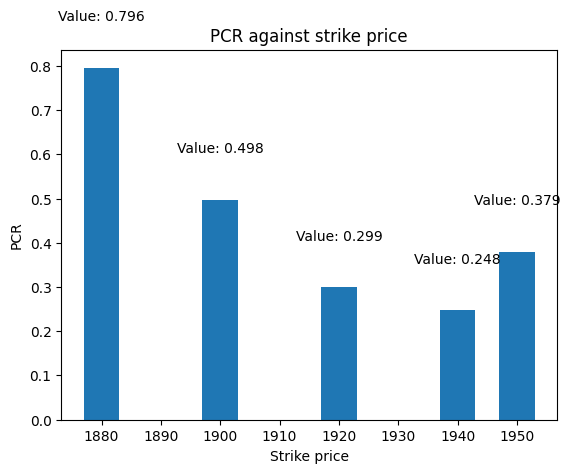

In [ ]:
plt.bar(newest["strikePrice"],newest["PCR"],width=6)
for i in range(5):
    plt.text(newest["strikePrice"].iloc[i], newest["PCR"].iloc[i]+0.1,"Value: {:.3f}".format(round(newest["PCR"].iloc[i], 3)), ha='center', va='bottom')
plt.title("PCR against strike price")
plt.xlabel("Strike price")
plt.ylabel("PCR")
plt.show()

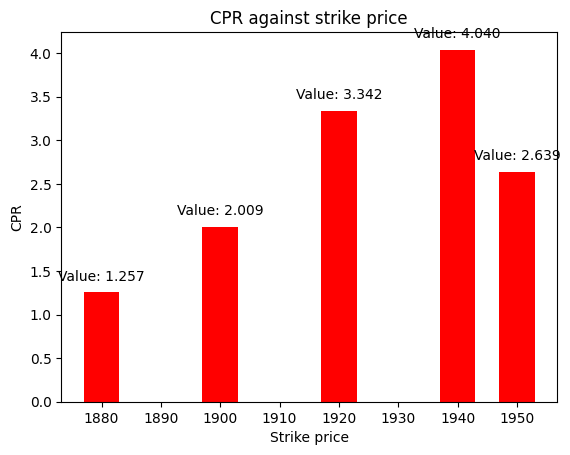

In [ ]:
plt.bar(newest["strikePrice"],newest["CPR"],width=6,color='red')
for i in range(5):
    plt.text(newest["strikePrice"].iloc[i], newest["CPR"].iloc[i]+0.1,"Value: {:.3f}".format(round(newest["CPR"].iloc[i], 3)), ha='center', va='bottom')
plt.title("CPR against strike price")
plt.xlabel("Strike price")
plt.ylabel("CPR")
plt.show()

In [ ]:
data = {'Apples': [3, 2, 4, 1], 'Oranges': [4, 1, 2, 4], 'Bananas': [2, 4, 3, 3]}
df = pd.DataFrame(data, index=['Q1', 'Q2', 'Q3', 'Q4'])
df

,Apples,Oranges,Bananas
Q1,3,4,2
Q2,2,1,4
Q3,4,2,3
Q4,1,4,3


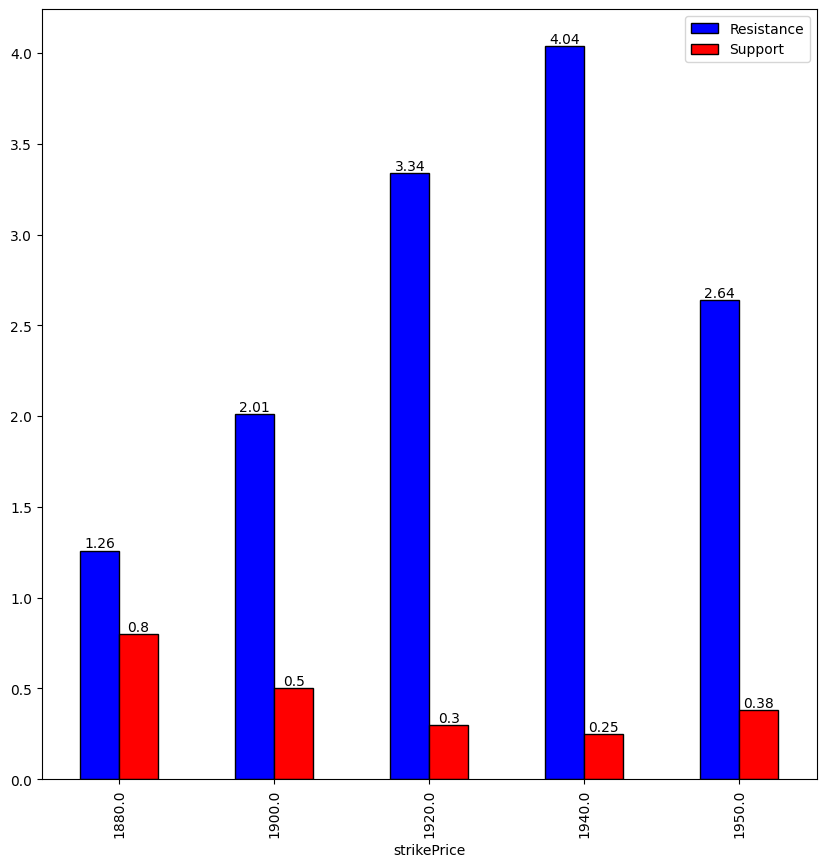

In [ ]:
S_R_data=newest[["CPR","PCR"]]
S_R_data = S_R_data.round(2)
S_R_data.set_index(newest["strikePrice"], inplace=True)
ax = S_R_data.plot(kind='bar',color=['blue', 'red'], edgecolor='black')
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', fontsize=10)
ax.legend(['Resistance','Support'])
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [ ]:
import time

# Get the current time in 24-hour format
current_time = time.strftime("%H:%M:%S")

# Convert the 24-hour format to 12-hour format with AM/PM
time_parts = current_time.split(":")
hours = int(time_parts[0])
minutes = int(time_parts[1])
seconds = int(time_parts[2])
if hours >= 12:
    suffix = "PM"
    hours -= 12
else:
    suffix = "AM"
if hours == 0:
    hours = 12
formatted_time = "{:02d}:{:02d}:{:02d} {}".format(hours, minutes, seconds, suffix)

# Print the current time in 12-hour format with AM/PM
print("The current time is", formatted_time)

The current time is 01:56:10 PM


In [ ]:
pip install schedule

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
